In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
movies = pd.read_csv('F:/Learning/Guided Project- Analyzing Movie Reviews/fandango_score_comparison.csv')
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

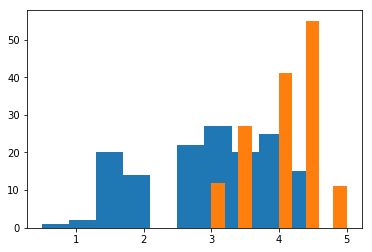

In [8]:
plt.hist(movies['Metacritic_norm_round'])
plt.hist(movies['Fandango_Stars'])

From the histogram plot, the Fandango rating seems to be very gracious as compared to Metacritic rating. Almost all the movie have been given a rating of 3+ by Fandango. Metacritic has a more normal distribution of ratings, except missing a bin probably due to rounding up the rating.

In [11]:
fan_mean = movies['Fandango_Stars'].mean()
print ('Mean Fandango Ratings : ' + str(fan_mean))
meta_mean = movies['Metacritic_norm_round'].mean()
print('Mean Metacritic Normalised Rounded Ratings : ' + str(meta_mean))
fan_median = np.median(movies['Fandango_Stars'])
print('Median of Fandango Ratings : ' + str(fan_median))
meta_median =np.median(movies['Metacritic_norm_round'])
print('Median of Metacritic Normalised Rounded Ratings : ' + str(meta_median))
fan_std = np.std(movies['Fandango_Stars'])
print('Standard Deviation of Fandango Ratings : ' + str(fan_std))
meta_std = np.std(movies['Metacritic_norm_round'])
print('Standard Deviation of Metacritic Normalised Rounded Ratings : ' + str(meta_std))

Mean Fandango Ratings : 4.089041095890411
Mean Metacritic Normalised Rounded Ratings : 2.9726027397260273
Median of Fandango Ratings : 4.0
Median of Metacritic Normalised Rounded Ratings : 3.0
Standard Deviation of Fandango Ratings : 0.5385321612699531
Standard Deviation of Metacritic Normalised Rounded Ratings : 0.9875610297038636


Fandango is not transparent about how it calculates and aggregates ratings for movies. Metacritic has a set transparent methodology to aggregate individual critic ratings to a final rating.

The median metacritic score is higher than the mean because a few low ratings push the mean down. The median Fandango rating is lower than the mean because a few high ratings push the mean up.

From the standard deviation of Fandango ratings, it can be inferred that the ratings are concentrated from 3 to 5. From the standard deviation of Metacritic scores, it is inferred that ratings are scattered from 1 to 5.

Overall, Fandango Ratings are much higher than Metacritic scores for each movie

(0, 5.5)

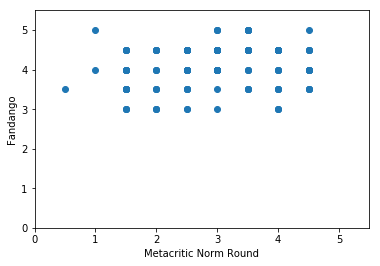

In [19]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.xlabel('Metacritic Norm Round')
plt.ylabel('Fandango')
plt.ylim(0,5.5)
plt.xlim(0,5.5)

In [21]:
movies['fm_diff'] = movies['Fandango_Stars'] - movies['Metacritic_norm_round']
movies['fm_diff'] = abs(movies['fm_diff'])
movies.sort_values(by = 'fm_diff', ascending = False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [23]:
from scipy.stats import pearsonr
r_value, p_value = pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
print(r_value)

0.178449190739


The low correlation between Fandango Stars and Metacritic Scores indicates that the Fandango Stars has no relation with the Metacritic Score of the same movie. Fandango seems to inflate the scores overall and individually depending on the movie.

In [24]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])

In [25]:
pred_3 = 3 * slope + intercept

In [27]:
print(pred_3)

4.09170715282


From the above linear regression calculation, for a metacritic score of 3 we predict the Fandango Stars to be 4.09.

(1, 5)

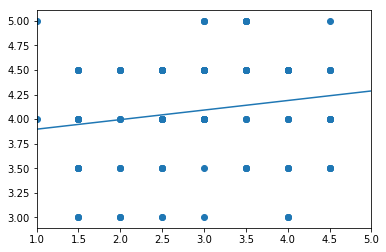

In [29]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.plot([1.0,5.0],[pred_1,pred_5])
plt.scatter( movies['Metacritic_norm_round'],movies['Fandango_Stars'])
plt.xlim(1,5)

From the Linear Regression, the expected Fandango ratings for the whole range of Metacritic normalised scores lie between 3.9 to 4.3